# Stock Price Prediction Machine Learning and Precision Test
Predicting stock market (SP500)

In [201]:
import yfinance as yf
import pandas as pd

sp500 = yf.Ticker("^GSPC")

sp500 = sp500.history(period="max")
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2025-09-04 00:00:00-04:00,6456.600098,6502.540039,6445.979980,6502.080078,4670770000,0.0,0.0
2025-09-05 00:00:00-04:00,6529.080078,6532.649902,6443.979980,6481.500000,5066120000,0.0,0.0
2025-09-08 00:00:00-04:00,6498.089844,6508.669922,6483.290039,6495.149902,5211500000,0.0,0.0


In [202]:
sp500.index

DatetimeIndex(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
               '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
               '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
               '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
               '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
               ...
               '2025-08-27 00:00:00-04:00', '2025-08-28 00:00:00-04:00',
               '2025-08-29 00:00:00-04:00', '2025-09-02 00:00:00-04:00',
               '2025-09-03 00:00:00-04:00', '2025-09-04 00:00:00-04:00',
               '2025-09-05 00:00:00-04:00', '2025-09-08 00:00:00-04:00',
               '2025-09-09 00:00:00-04:00', '2025-09-10 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=24539, freq=None)

### Cleaning and Slicing

<Axes: xlabel='Date'>

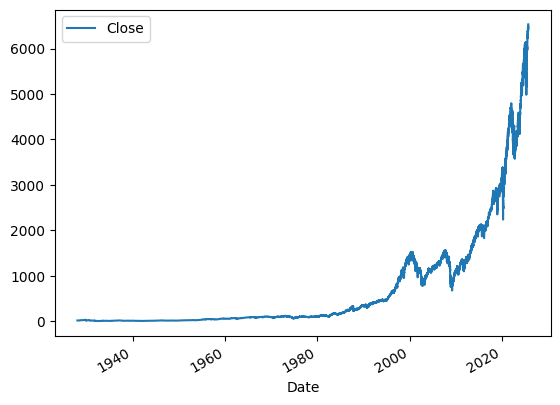

In [203]:
sp500.plot.line(y="Close", use_index=True)

In [204]:
## There columns are only necessary for individual stocks
## We can delete them for the S&P 500 index
del sp500["Dividends"]
del sp500["Stock Splits"]

# Target will the price go up or down tomorrow?
# Get directionality, predicting actual price, predicting the day price goes up 

sp500["Tomorrow"] = sp500["Close"].shift(-1)

sp500




,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000
...,...,...,...,...,...,...
2025-09-04 00:00:00-04:00,6456.600098,6502.540039,6445.979980,6502.080078,4670770000,6481.500000
2025-09-05 00:00:00-04:00,6529.080078,6532.649902,6443.979980,6481.500000,5066120000,6495.149902
2025-09-08 00:00:00-04:00,6498.089844,6508.669922,6483.290039,6495.149902,5211500000,6512.609863


In [205]:
# Set up the target, predicting if the price will go up or down tomorrow using machine learning 

sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int) 

In [206]:
# only use useful data after 2000, .copy to avoid SettingWithCopyWarning 
sp500 = sp500.loc["2000-01-01":].copy()
sp500


,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
2000-01-03 00:00:00-05:00,1469.250000,1478.000000,1438.359985,1455.219971,931800000,1399.420044,0
2000-01-04 00:00:00-05:00,1455.219971,1455.219971,1397.430054,1399.420044,1009000000,1402.109985,1
2000-01-05 00:00:00-05:00,1399.420044,1413.270020,1377.680054,1402.109985,1085500000,1403.449951,1
2000-01-06 00:00:00-05:00,1402.109985,1411.900024,1392.099976,1403.449951,1092300000,1441.469971,1
2000-01-07 00:00:00-05:00,1403.449951,1441.469971,1400.729980,1441.469971,1225200000,1457.599976,1
...,...,...,...,...,...,...,...
2025-09-04 00:00:00-04:00,6456.600098,6502.540039,6445.979980,6502.080078,4670770000,6481.500000,0
2025-09-05 00:00:00-04:00,6529.080078,6532.649902,6443.979980,6481.500000,5066120000,6495.149902,1
2025-09-08 00:00:00-04:00,6498.089844,6508.669922,6483.290039,6495.149902,5211500000,6512.609863,1


## Machine Learning Set UP / Learn Decision Tree 


In [207]:
# train my first machine learning mode, using RandomForestClassifier from sklearn
# As the tomorrow price > to today price, 1 else 0, this show correlation between open price and the target(Tomorrow)
from sklearn.ensemble import RandomForestClassifier 

# Initialising the model , n_estimators is the number of trees in the forest we want to train,more are usually better
# min_samples_split is the minimum number of samples required to split an internal node
# random_state is the seed used by the random number generator, random number generated will be in a predictable sequence 
# Finding linear relationship between features and target
model = RandomForestClassifier(n_estimators=100, min_samples_split=10, random_state=1)

train = sp500.iloc[:-100] # all rows except the last 100
test = sp500.iloc[-100:]  # the last 100 rows   


predictors = ["Close", "Volume", "Open", "High", "Low"] 
model.fit(train[predictors], train["Target"]) # Predictors are the features, Target is what we want to predict


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,10
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


### Predictor and Initial model 
 Using train test predictors and model 

In [208]:
# Measure the accuracy of the model, does the market go up when the model says it will go up? 1 or 0
# As we buy stock we want to hold it and sell it at the right time 
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])


import pandas as pd 
preds = pd.Series(preds, index=test.index) # Convert preds to a pandas Series, with the same index as test

In [209]:
precision_score(test["Target"], preds)      # 0.645, not very good, only slightly better than random guessing

0.6451612903225806

<Axes: xlabel='Date'>

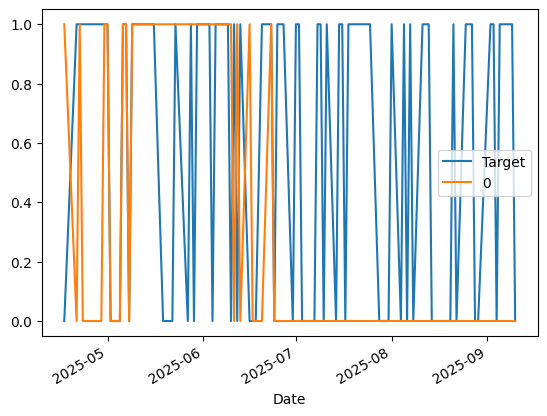

In [210]:
combined = pd.concat([test["Target"], preds], axis=1)   
combined.plot()  # oragne is predictions, blue is actual target

## Build a Backtesting System 
Test multiple years of data, to know how the algorithm is handkling a diffrent situations 

In [211]:
# creating prediction function

def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

# Backtest functions, 1 trading year has about 250 trading days  
# Start with 2500 days of training data, and make predictions for the next 250 days, then move forward 250 days and repeat for 10 years 
# Predict the 11th to 12th year, so on, see how well the model would have done
# TO HAVE CONFIDENCE IN THE MODEL, IT NEEDS TO BE TESTED OVER MANY DIFFERENT TIME PERIODS


def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []
    
    for i in range(start, data.shape[0], step): # data.shape[0] is the number of rows in the data .shape -> (rows, columns)
        train = data.iloc[0:i].copy() # Training set, years prior to the current year
        test = data.iloc[i:(i+step)].copy() # Current year 
        predictions = predict(train, test, predictors, model) 
        all_predictions.append(predictions)
    return pd.concat(all_predictions)


In [214]:
predictions = backtest(sp500, model, predictors)


predictions["Predictions"].value_counts()  # How many times did the model predict up or down? 

# 1 means up, 0 means down

Predictions
0    2608
1    1353
Name: count, dtype: int64

In [217]:
precision_score(predictions["Target"], predictions["Predictions"])  

0.5358462675535847

In [218]:
# Convert to percentage by dividing 
predictions["Target"].value_counts() / predictions.shape[0]



Target
1    0.546327
0    0.453673
Name: count, dtype: float64

# Add Additional Predictors to improve model

In [222]:
## Add more predictors to our model
# Create a variety of technical indicators as predictors
horizons = [2, 5, 60, 250, 1000]  # Number of days in the future to predict/ length of time model is set to compute
new_predictors = [] 

for horizon in horizons:
    rolling_averages = sp500.rolling(horizon).mean()  # Calculate the rolling average over the specified horizon
    ratio_column = f"Close_Ratio_{horizon}"  # Name of the new predictor column
    sp500[ratio_column] = sp500["Close"] / rolling_averages["Close"]  # Create the new predictor column
    
    trend_column = f"Trend_{horizon}"  # Name of the new predictor column
    sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"] / horizon  # Create the new predictor column,  find sum of the target/ number of days stock goes up 
    
    new_predictors += [ratio_column, trend_column]  # Add the new predictor columns to the list of predictors
    
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
2000-01-03 00:00:00-05:00,1469.250000,1478.000000,1438.359985,1455.219971,931800000,1399.420044,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-04 00:00:00-05:00,1455.219971,1455.219971,1397.430054,1399.420044,1009000000,1402.109985,1,0.980453,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-05 00:00:00-05:00,1399.420044,1413.270020,1377.680054,1402.109985,1085500000,1403.449951,1,1.000960,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-06 00:00:00-05:00,1402.109985,1411.900024,1392.099976,1403.449951,1092300000,1441.469971,1,1.000478,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-07 00:00:00-05:00,1403.449951,1441.469971,1400.729980,1441.469971,1225200000,1457.599976,1,1.013364,1.0,1.014881,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-09-04 00:00:00-04:00,6456.600098,6502.540039,6445.979980,6502.080078,4670770000,6481.500000,0,1.004156,1.0,1.005642,0.6,1.034119,0.550000,1.097597,0.568,1.346215,0.528
2025-09-05 00:00:00-04:00,6529.080078,6532.649902,6443.979980,6481.500000,5066120000,6495.149902,1,0.998415,0.5,1.003091,0.4,1.029638,0.533333,1.093401,0.568,1.341393,0.528
2025-09-08 00:00:00-04:00,6498.089844,6508.669922,6483.290039,6495.149902,5211500000,6512.609863,1,1.001052,0.5,1.004119,0.6,1.030516,0.550000,1.094901,0.572,1.343654,0.528


In [224]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    #preds = model.predict(test[predictors]) # return 0 or 1 
    preds = model.predict_proba(test[predictors])[:,1] # return probability
    preds[preds >= 0.6] = 1  # Set a threshold of 0.6 for predicting an upward movement
    preds[preds < 0.6] = 0   # Set a threshold of 0.6 for predicting a downward movement
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined


predictions = backtest(sp500, model, predictors + new_predictors)  # Combine the original and new predictors    

predictions["Predictions"].value_counts()  # How many times did the model predict up or down?


Predictions
0.0    3485
1.0     476
Name: count, dtype: int64

In [225]:
precision_score(predictions["Target"], predictions["Predictions"]) # this model is 50% correct

0.5042016806722689

Do the same with other indices, use those to see correlation with SP500 
Add news, interest rate, inflation 
Add key stocks or sectors,; ;;; TECH such as APPLE 
Increase resolution, into hourly data instead of days 


